In [3]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))

from config import (
    EXPERIMENTS_CF_PATH,
    EXPERIMENTS_CB_PATH,
    EXPERIMENTS_HYBRID_PATH,
)

This notebook is used to visualize the results of the hyperparameter experiments.  

For the CF algorithm:

In [90]:
# loading CF experiments results
cf_exp_df = pd.read_csv("../" + EXPERIMENTS_CF_PATH, header=0)

# filtering on where bias=False (no damping)
no_bias_df = cf_exp_df[cf_exp_df["damping"] == "-"].reset_index()

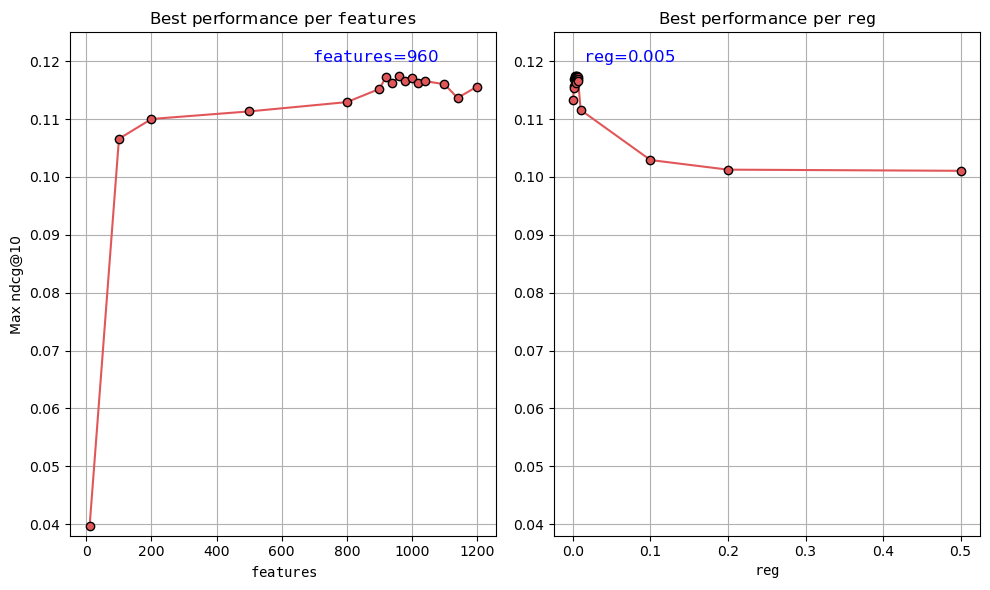

In [ ]:
nrows, ncols = 1, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 6))

groupby_cols = ["features", "reg"]

for i, col in enumerate(groupby_cols):
    grouped = no_bias_df.groupby(col)["ndcg@10"].max().reset_index()
    axes[i].plot(grouped[col], grouped["ndcg@10"], marker="o", c="#E15759", markeredgecolor="black")
    col_code = rf"$\mathtt{{{col}}}$"
    axes[i].set_title(f"Best performance per {col_code}")
    axes[i].set_xlabel(f"{col_code}")
    axes[i].grid(True)
    axes[i].set_ylim(0.038, 0.125)

    # Add annotation for the best point
    best_idx = grouped["ndcg@10"].idxmax()
    best_x = grouped.loc[best_idx, col]
    best_y = grouped.loc[best_idx, "ndcg@10"]
    axes[i].annotate(f"{col_code}={best_x}", (best_x*0.7, best_y*1.01),
                     textcoords="offset points", xytext=(5, 5),
                     ha='left', fontsize=12, color="blue")

    if i == 0:
        axes[i].set_ylabel("Max ndcg@10")
    
plt.tight_layout()
plt.show()

For the content-based recommender:

For the hybrid recommender: